# descriptive.ipynb

This notebook calculated descriptive statistics in detail. The main notebook reports just a summary.

The `display_summary_table` and `plot_descriptive` functions below are called from the main notebook.

<br>
<br>

In [1]:
from IPython.display import display,Markdown #,HTML
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd


def display_title(s, pref='Figure', num=1, center=False):
    ctag = 'center' if center else 'p'
    s    = f'<{ctag}><span style="font-size: 1.2em;"><b>{pref} {num}</b>: {s}</span></{ctag}>'
    if pref=='Figure':
        s = f'{s}<br><br>'
    else:
        s = f'<br><br>{s}'
    display( Markdown(s) )



Below the previously developed `parse_data.ipynb` notebook is run. See that notebook for details.

In [2]:
%run parse_data.ipynb
numerical = ['concentration', 'dew point', 'temperature', 'pressure', 'wind speed', 'rainfall duration'] # exclude month and days (they are categorial data)

df[numerical].describe()

concentration     dew point   temperature      pressure    wind speed  \
count   41757.000000  41757.000000  41757.000000  41757.000000  41757.000000   
mean       98.613215      1.750174     12.401561   1016.442896     23.866747   
std        92.050387     14.433658     12.175215     10.300733     49.617495   
min         0.000000    -40.000000    -19.000000    991.000000      0.450000   
25%        29.000000    -10.000000      2.000000   1008.000000      1.790000   
50%        72.000000      2.000000     14.000000   1016.000000      5.370000   
75%       137.000000     15.000000     23.000000   1025.000000     21.910000   
max       994.000000     28.000000     42.000000   1046.000000    565.490000   

       rainfall duration  
count       41757.000000  
mean            0.194866  
std             1.418165  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max            36.000000

To create a custom display of descriptive statistics, let's first define functions that will calculate central tendency and dispersion metrics.

Refer also to [this notebook](https://github.com/0todd0000/OpenBook-DataAnalysisPracticeInPythonAndJupyter/blob/master/Lessons/Lesson04/5-Examples/DescriptiveStatsExamples.ipynb) for details regarding how create custom descriptive statistics tables.

In [3]:
def central(x, print_output=True):
    x0     = np.mean( x )
    x1     = np.median( x )
    x2     = stats.mode( x ).mode
    return x0, x1, x2


def dispersion(x, print_output=True):
    y0 = np.std( x ) # standard deviation
    y1 = np.min( x )  # minimum
    y2 = np.max( x )  # maximum
    y3 = y2 - y1      # range
    y4 = np.percentile( x, 25 ) # 25th percentile (i.e., lower quartile)
    y5 = np.percentile( x, 75 ) # 75th percentile (i.e., upper quartile)
    y6 = y5 - y4 # inter-quartile range
    return y0,y1,y2,y3,y4,y5,y6

<br>

Let's now assemble and display a central tendency table:

</br>

In [4]:
def display_central_tendency_table(num=1):
    display_title('Central tendency summary statistics.', pref='Table', num=num, center=False)
    numerical         = ['concentration', 'dew point', 'temperature', 'pressure', 'wind speed', 'rainfall duration'] # exclude month and days (they are categorial data)
    df_central        = df[numerical].apply(lambda x: central(x), axis=0)
    round_dict        = {'concentration': 2, 'dew point': 2, 'temperature': 2, 'pressure': 2, 'wind speed': 2, 'rainfall duration': 2}
    df_central        = df_central.round( round_dict )
    row_labels        = 'mean', 'median', 'mode'
    df_central.index  = row_labels
    display( df_central )

display_central_tendency_table(num=1)

<br><br><p><span style="font-size: 1.2em;"><b>Table 1</b>: Central tendency summary statistics.</span></p>

concentration  dew point  temperature  pressure  wind speed  \
mean            98.61       1.75         12.4   1016.44       23.87   
median          72.00       2.00         14.0   1016.00        5.37   
mode            16.00      18.00         24.0   1014.00        0.89   

        rainfall duration  
mean                 0.19  
median               0.00  
mode                 0.00

<br>

Let's repeat for a dispersion table:

</br>

In [5]:
def display_dispersion_table(num=1):
    display_title('Dispersion summary statistics.', pref='Table', num=num, center=False)
    round_dict            = {'concentration': 2, 'dew point': 2, 'temperature': 2, 'pressure': 2, 'wind speed': 2, 'rainfall duration': 2}
    numerical             = ['concentration', 'dew point', 'temperature', 'pressure', 'wind speed', 'rainfall duration'] # exclude month and days (they are categorial data)
    df_dispersion         = df[numerical].apply(lambda x: dispersion(x), axis=0).round( round_dict )
    row_labels_dispersion = 'st.dev.', 'min', 'max', 'range', '25th', '75th', 'IQR'
    df_dispersion.index   = row_labels_dispersion
    display( df_dispersion )

display_dispersion_table(num=2)


<br><br><p><span style="font-size: 1.2em;"><b>Table 2</b>: Dispersion summary statistics.</span></p>

concentration  dew point  temperature  pressure  wind speed  \
st.dev.          92.05      14.43        12.18      10.3       49.62   
min               0.00     -40.00       -19.00     991.0        0.45   
max             994.00      28.00        42.00    1046.0      565.49   
range           994.00      68.00        61.00      55.0      565.04   
25th             29.00     -10.00         2.00    1008.0        1.79   
75th            137.00      15.00        23.00    1025.0       21.91   
IQR             108.00      25.00        21.00      17.0       20.12   

         rainfall duration  
st.dev.               1.42  
min                   0.00  
max                  36.00  
range                36.00  
25th                  0.00  
75th                  0.00  
IQR                   0.00

Let's save the variables in easier-to-use variable names:

In [6]:
y       = df['concentration']
dewp    = df['dew point']
temp    = df['temperature']
pres    = df['pressure']
wspd    = df['wind speed']
raindur = df['rainfall duration']

Let's create scatterplots for the DV (concentration) vs. each of the five IVs (dew point, temperature, pressure, wind speed, and rainfall duration):

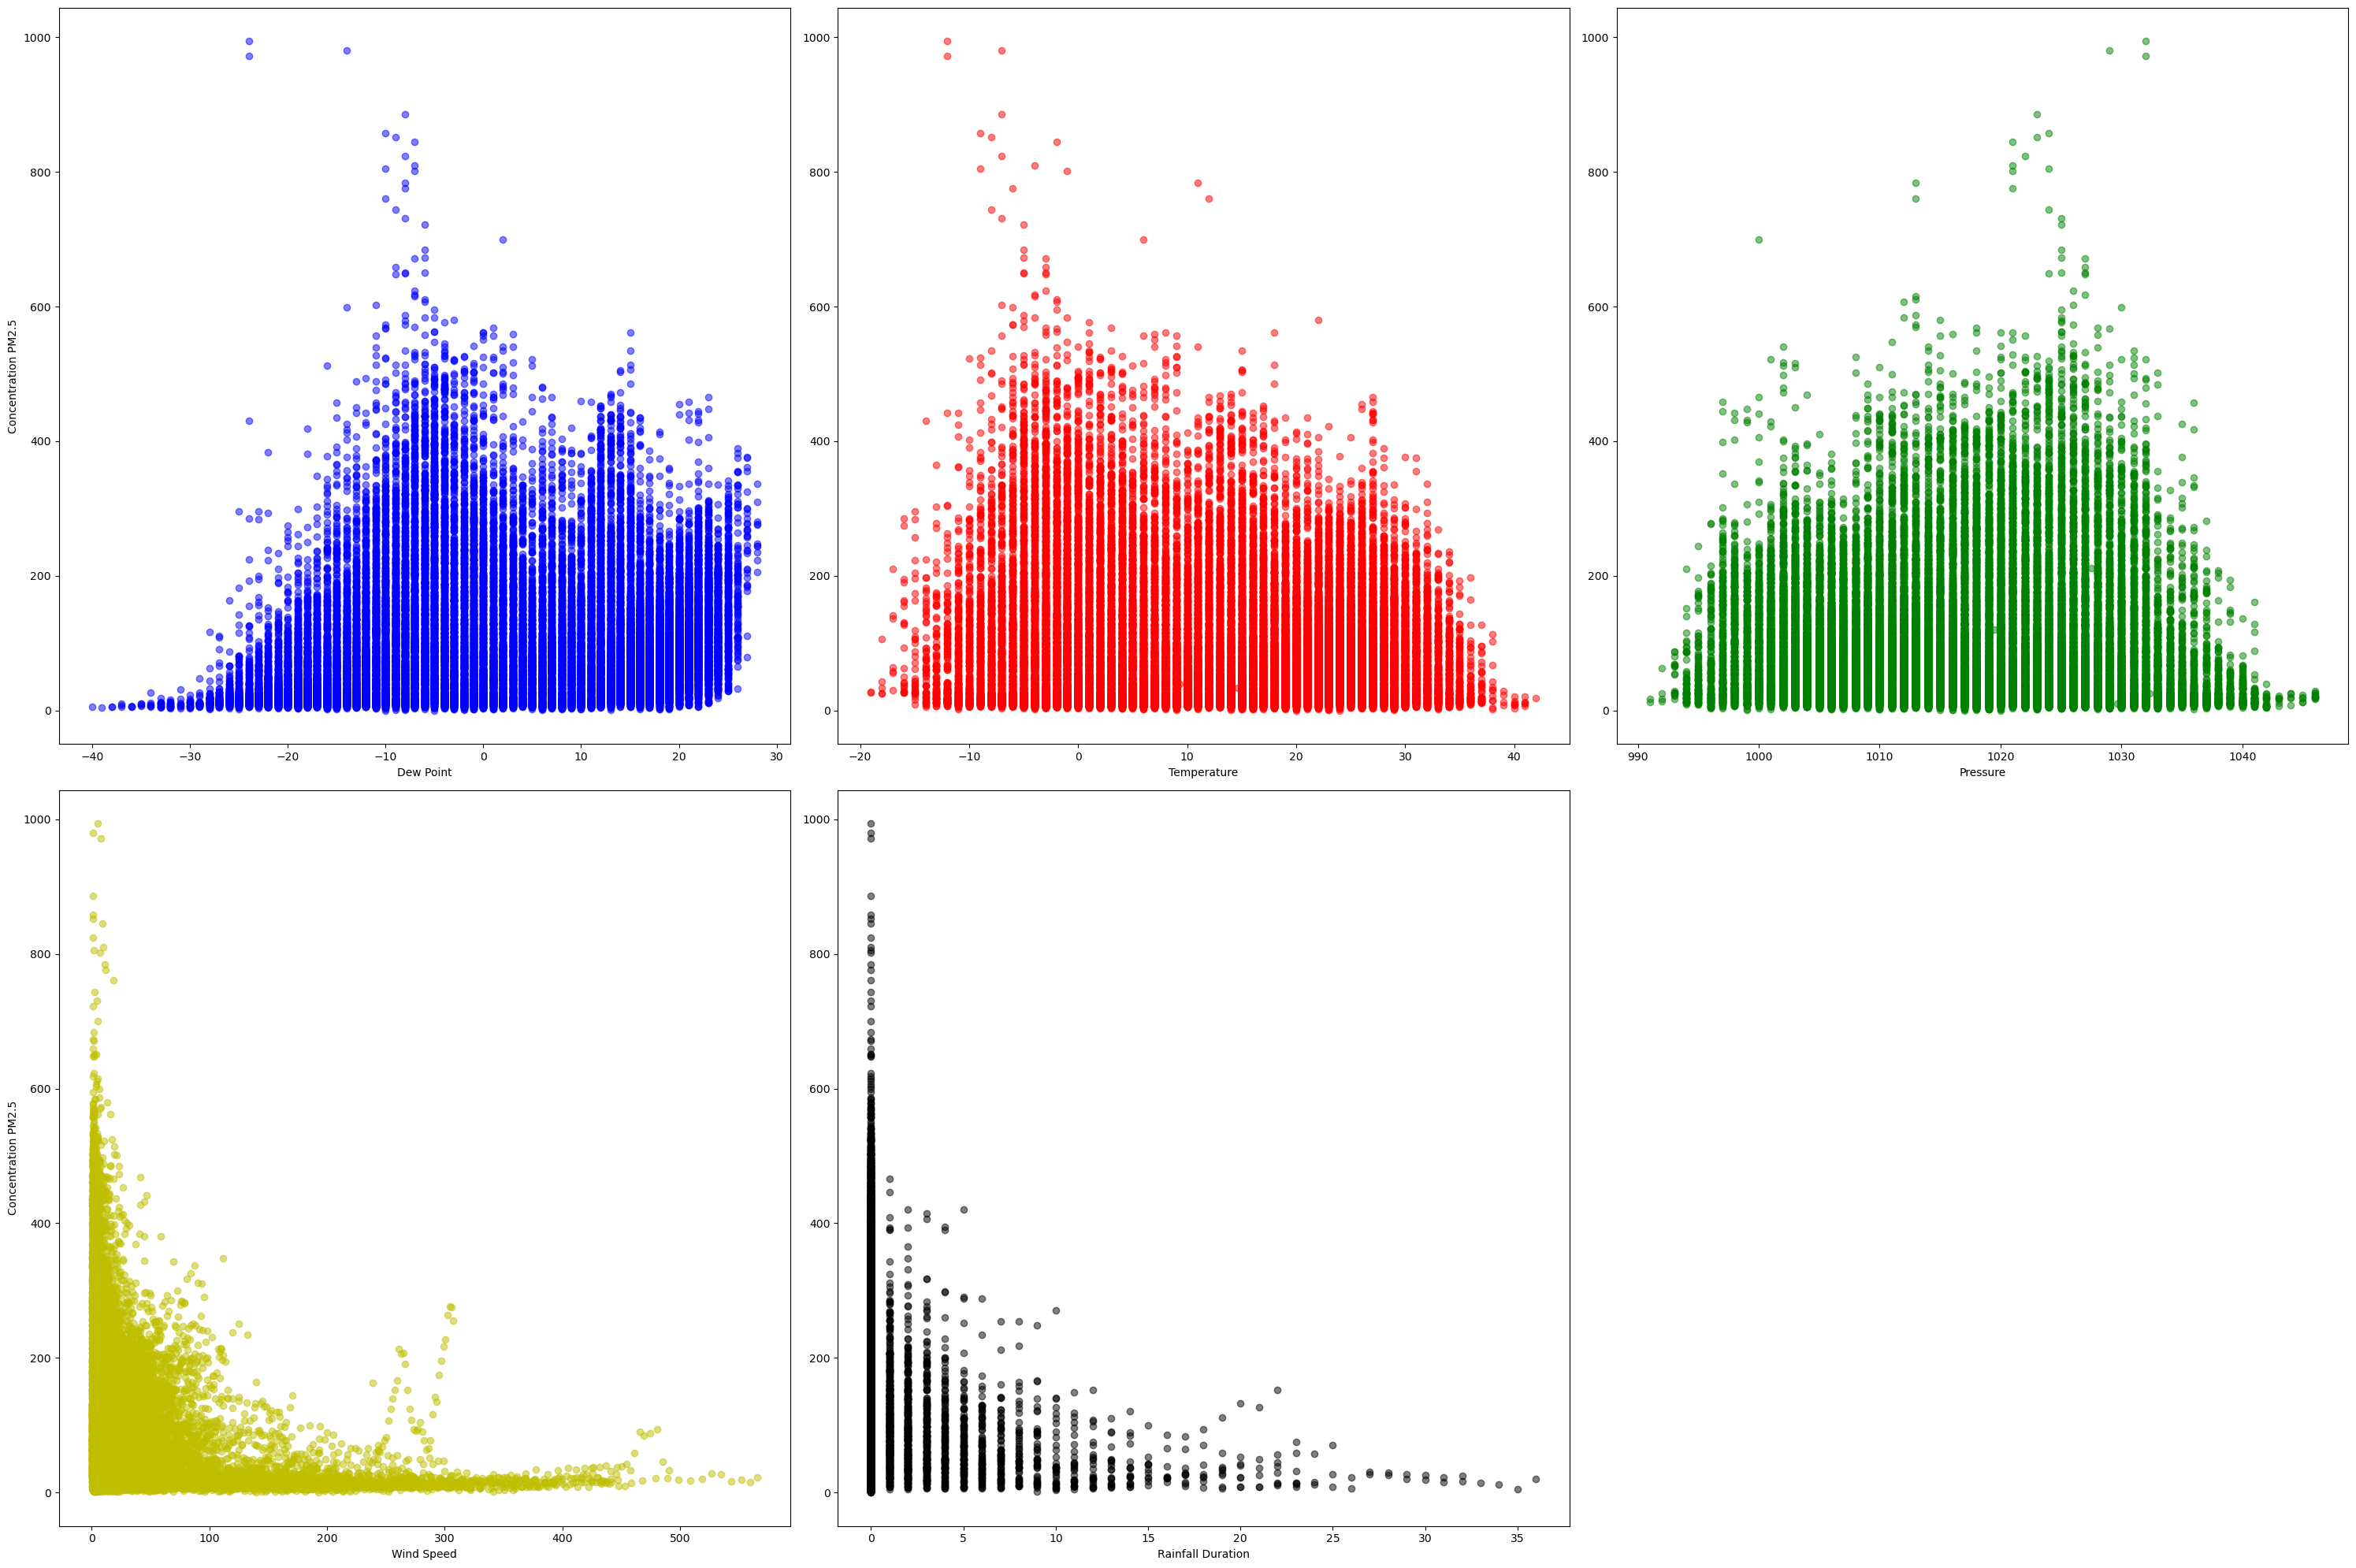

In [7]:
fig, axs = plt.subplots(2, 3, figsize=(30,20), tight_layout=True)

axs[0,0].scatter(dewp, y, alpha=0.5, color='b')
axs[0,1].scatter(temp, y, alpha=0.5, color='r')
axs[0,2].scatter(pres, y, alpha=0.5, color='g')
axs[1,0].scatter(wspd, y, alpha=0.5, color='y')
axs[1,1].scatter(raindur, y, alpha=0.5, color='k')
axs[1,2].axis('off')  

xlabels = ['Dew Point', 'Temperature', 'Pressure', 'Wind Speed', 'Rainfall Duration']

for ax, label in zip(axs.flat[:-1], xlabels): ax.set_xlabel(label)

for ax in [axs[0,0], axs[1,0]]: ax.set_ylabel('Concentration PM2.5')

plt.show()


The data is not normally distributed (Right skewed distribution with extreme outliers)

However, let's first add regression lines and correlation coefficients to each plot to see the relationship:

In [8]:
from scipy.stats import spearmanr

def corrcoeff(x, y):
    r, p = spearmanr(x, y)   # use spearman because the data is not normally distributed (there extreme) outlier
    return r

def plot_regression_line(ax, x, y, **kwargs):
    a,b   = np.polyfit(x, y, deg=1)
    x0,x1 = min(x), max(x)
    y0,y1 = a*x0 + b, a*x1 + b
    ax.plot([x0,x1], [y0,y1], **kwargs)


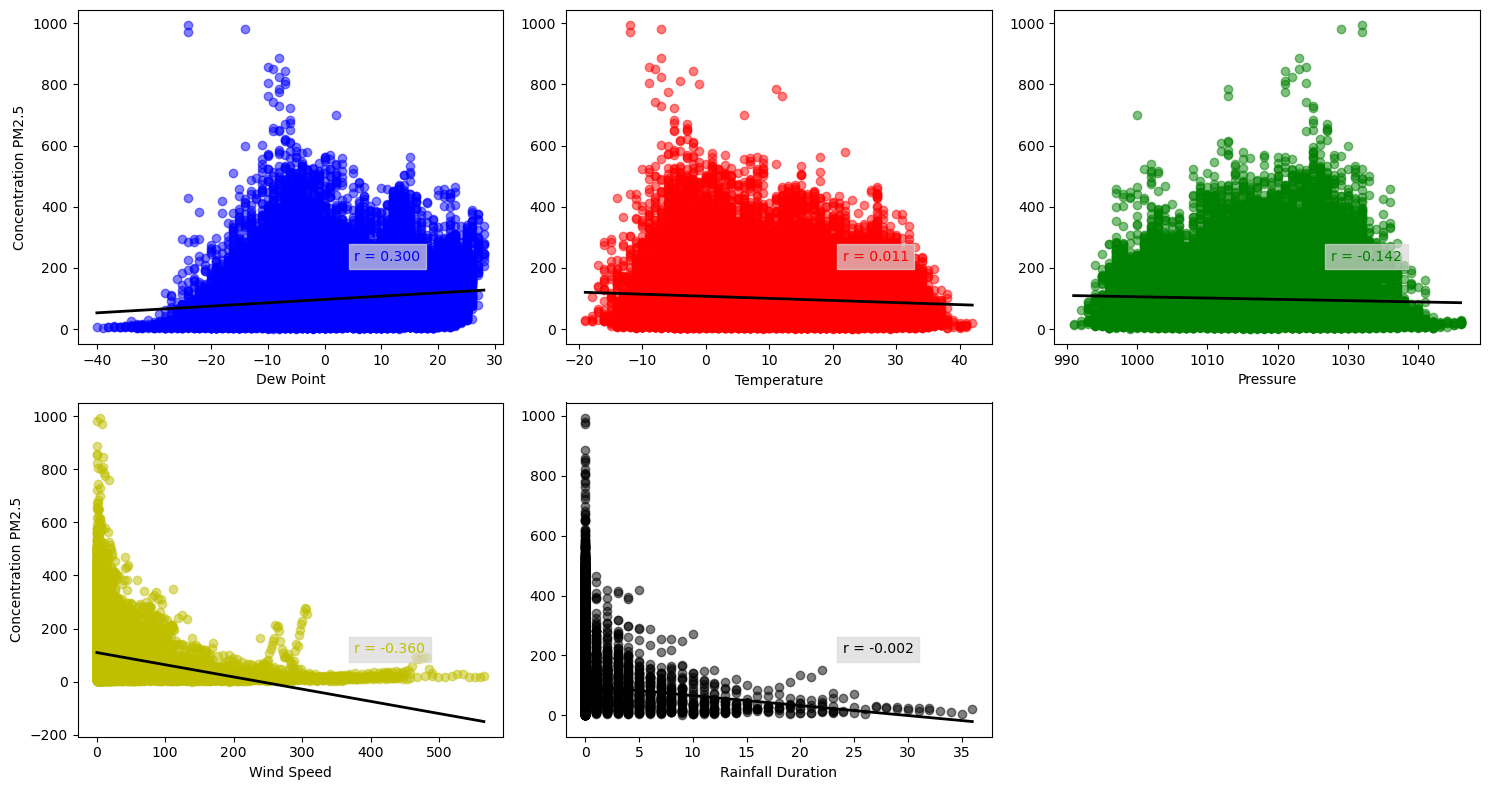

In [9]:
fig, axs = plt.subplots(2, 3, figsize=(15,8), tight_layout=True)

ivs = [dewp, temp, pres, wspd, raindur]
colors = ['b','r','g','y','k']

for ax, x, c in zip(axs.flat, ivs, colors):
    ax.scatter(x, y, alpha=0.5, color=c)
    plot_regression_line(ax, x, y, color='k', ls='-', lw=2)
    r = corrcoeff(x, y)
    ax.text(0.65, 0.25, f'r = {r:.3f}', color=c,transform=ax.transAxes, bbox=dict(color='0.85', alpha=0.7))

axs.flat[-1].axis('off')

xlabels = ['Dew Point', 'Temperature', 'Pressure', 'Wind Speed', 'Rainfall Duration']
for ax, label in zip(axs.flat[:-1], xlabels): ax.set_xlabel(label)

axs[0,0].set_ylabel('Concentration PM2.5')
axs[1,0].set_ylabel('Concentration PM2.5')

plt.show()



The r-value is relatively small, implying unclear linear correlation between meteorological factor and concentration of PM2.5

Next, let's remove the outliers to see whether the correlation (r-value) will improve or not

In [10]:
# calculate how many outliers in PM2.5 concentration
from scipy.stats import zscore

df['z_concentration'] = zscore(df['concentration'])
outliers = df[df['z_concentration'].abs() > 3] #assume if the z-score is above or below 3, it categorize as outliers
print("total outlier PM2.5:", len(outliers))

df_clean = df[df['z_concentration'].abs() <= 3]


total outlier PM2.5: 769


Make scatterplot IVs vs DV after remove the outliers

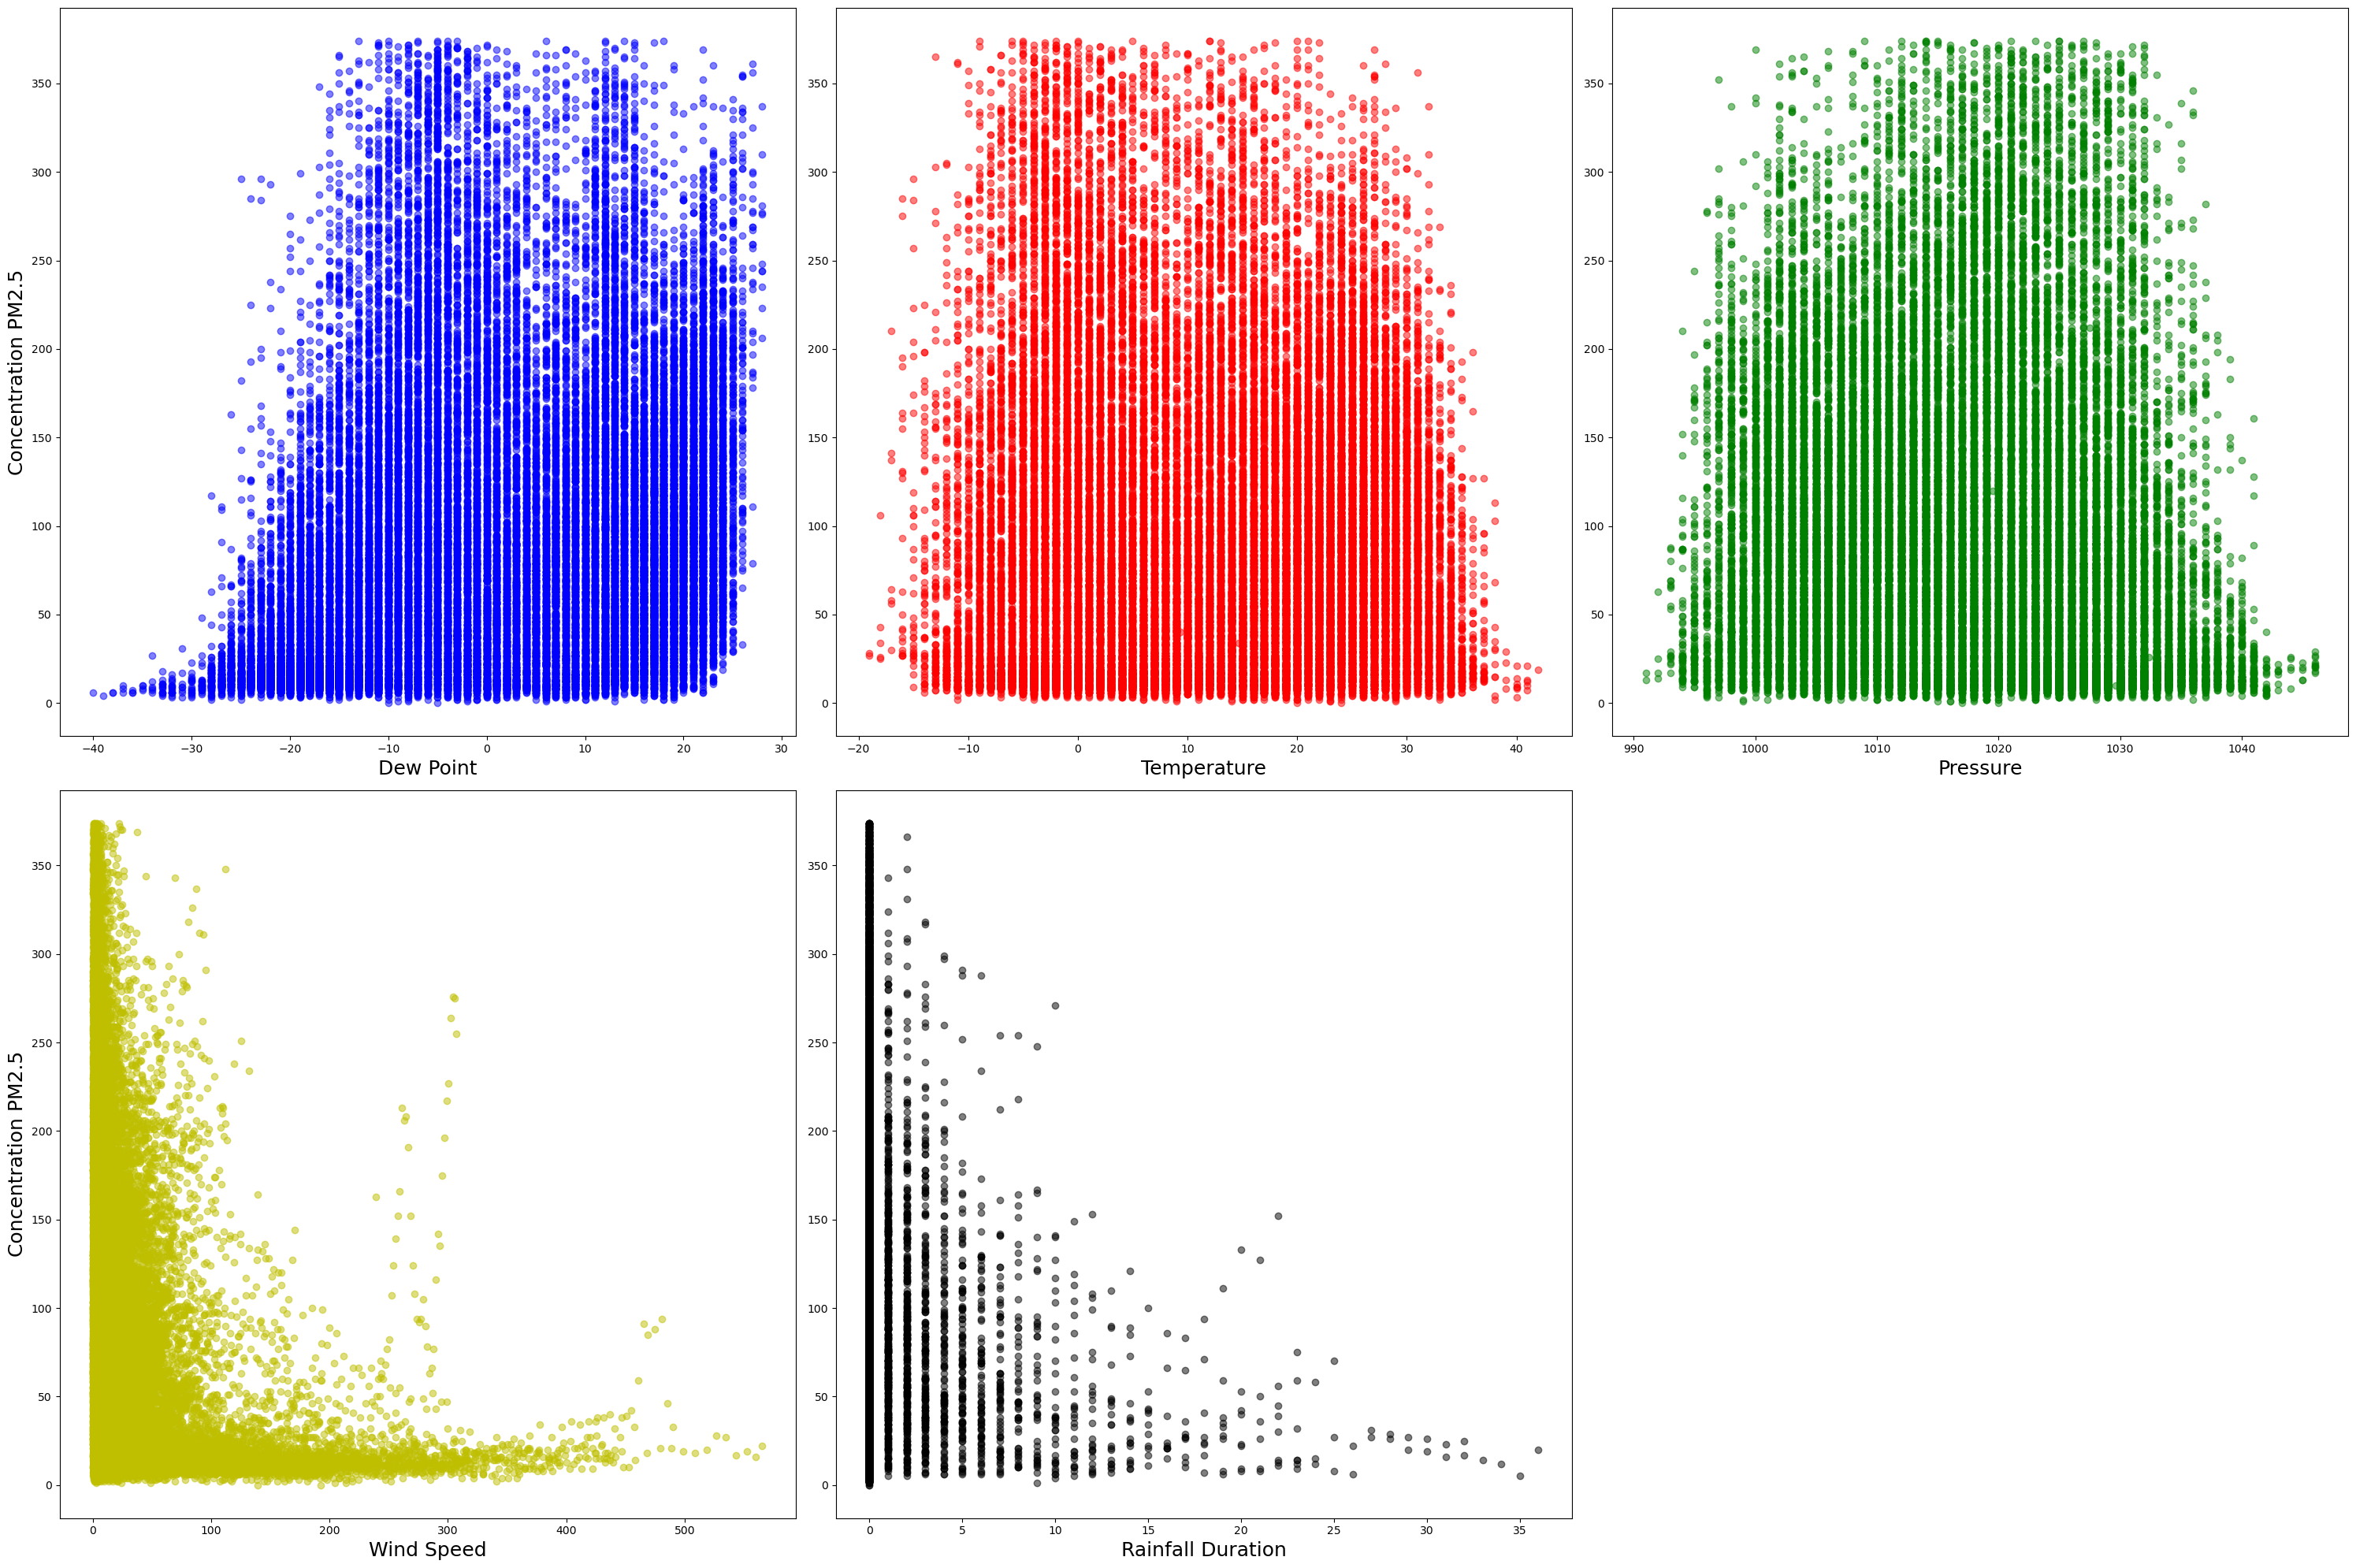

In [11]:
from scipy.stats import zscore

df['z_concentration'] = zscore(df['concentration'])
df_clean = df[df['z_concentration'].abs() <= 3] #remove the outliers

y       = df_clean['concentration']
dewp    = df_clean['dew point']
temp    = df_clean['temperature']
pres    = df_clean['pressure']
wspd    = df_clean['wind speed']
raindur = df_clean['rainfall duration']

fig, axs = plt.subplots(2, 3, figsize=(30,20), tight_layout=True)

axs[0,0].scatter(dewp, y, alpha=0.5, color='b')
axs[0,1].scatter(temp, y, alpha=0.5, color='r')
axs[0,2].scatter(pres, y, alpha=0.5, color='g')
axs[1,0].scatter(wspd, y, alpha=0.5, color='y')
axs[1,1].scatter(raindur, y, alpha=0.5, color='k')
axs[1,2].axis('off')

xlabels = ['Dew Point', 'Temperature', 'Pressure', 'Wind Speed', 'Rainfall Duration']

for ax, label in zip(axs.flat[:-1], xlabels):
    ax.set_xlabel(label, fontsize=18)

for ax in [axs[0,0], axs[1,0]]:
    ax.set_ylabel('Concentration PM2.5', fontsize=18)

plt.show()


Make scatterplot DVs vs IV with the linear regression line and r-value

In [12]:
def corrcoeff(x, y):
    r_matrix = np.corrcoef(x, y)
    r = r_matrix[0, 1]
    return r
    
def plot_regression_line(ax, x, y, **kwargs):
    a,b   = np.polyfit(x, y, deg=1)
    x0,x1 = min(x), max(x)
    y0,y1 = a*x0 + b, a*x1 + b
    ax.plot([x0,x1], [y0,y1], **kwargs)

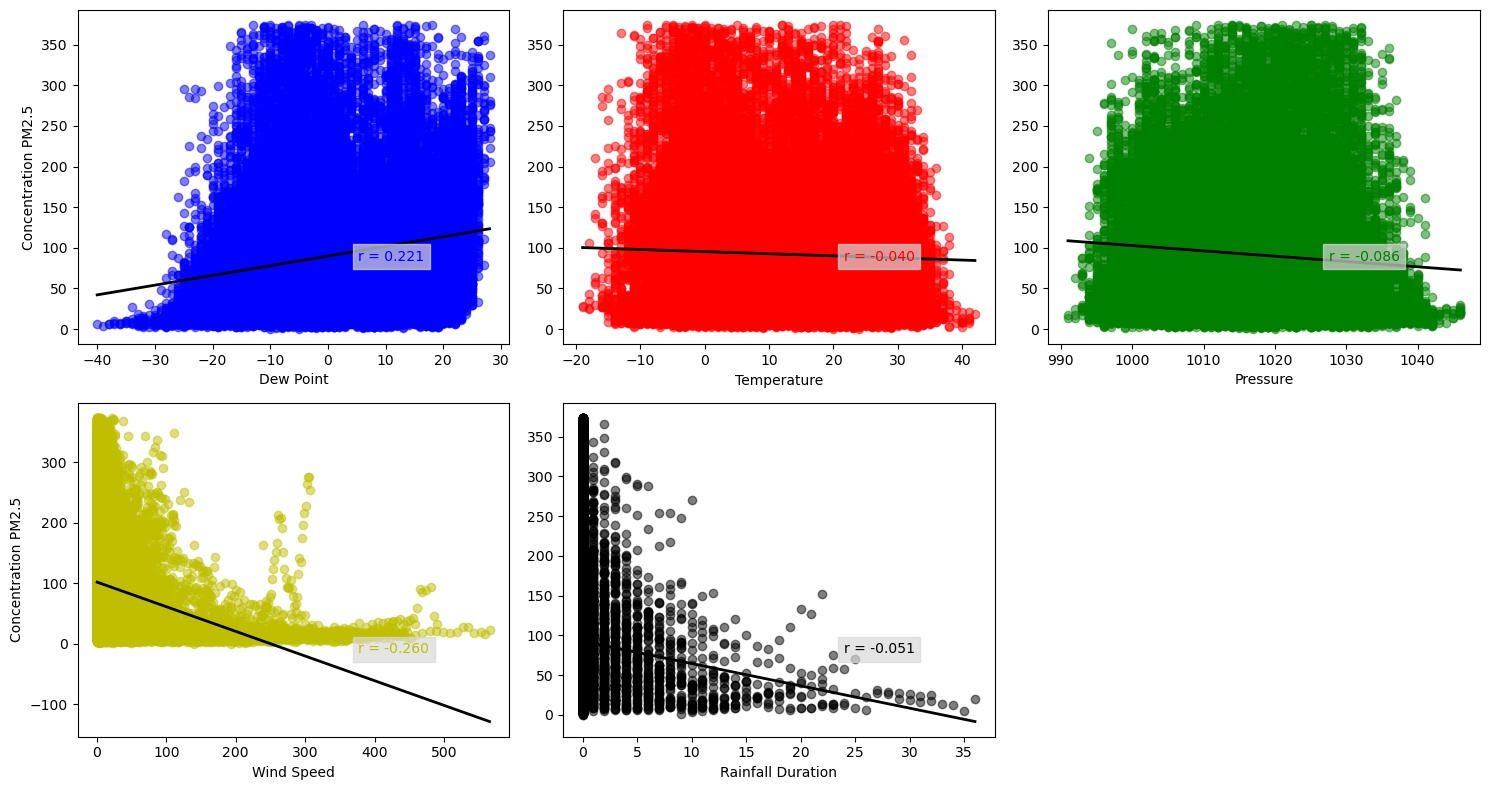

In [13]:
fig, axs = plt.subplots(2, 3, figsize=(15,8), tight_layout=True)

ivs = [dewp, temp, pres, wspd, raindur]
colors = ['b','r','g','y','k']

for ax, x, c in zip(axs.flat, ivs, colors):
    ax.scatter(x, y, alpha=0.5, color=c)
    plot_regression_line(ax, x, y, color='k', ls='-', lw=2)
    r = corrcoeff(x, y)
    ax.text(0.65, 0.25, f'r = {r:.3f}', color=c,transform=ax.transAxes, bbox=dict(color='0.85', alpha=0.7))

axs.flat[-1].axis('off')

xlabels = ['Dew Point', 'Temperature', 'Pressure', 'Wind Speed', 'Rainfall Duration']
for ax, label in zip(axs.flat[:-1], xlabels): ax.set_xlabel(label)

axs[0,0].set_ylabel('Concentration PM2.5')
axs[1,0].set_ylabel('Concentration PM2.5')

plt.show()


The r-value are not significantly change after remove the outliers. Next, we will assume that the PM2.5 concentration is also influenced by the season. Thus the data (without outliers) **will be categorized based on four season** in China

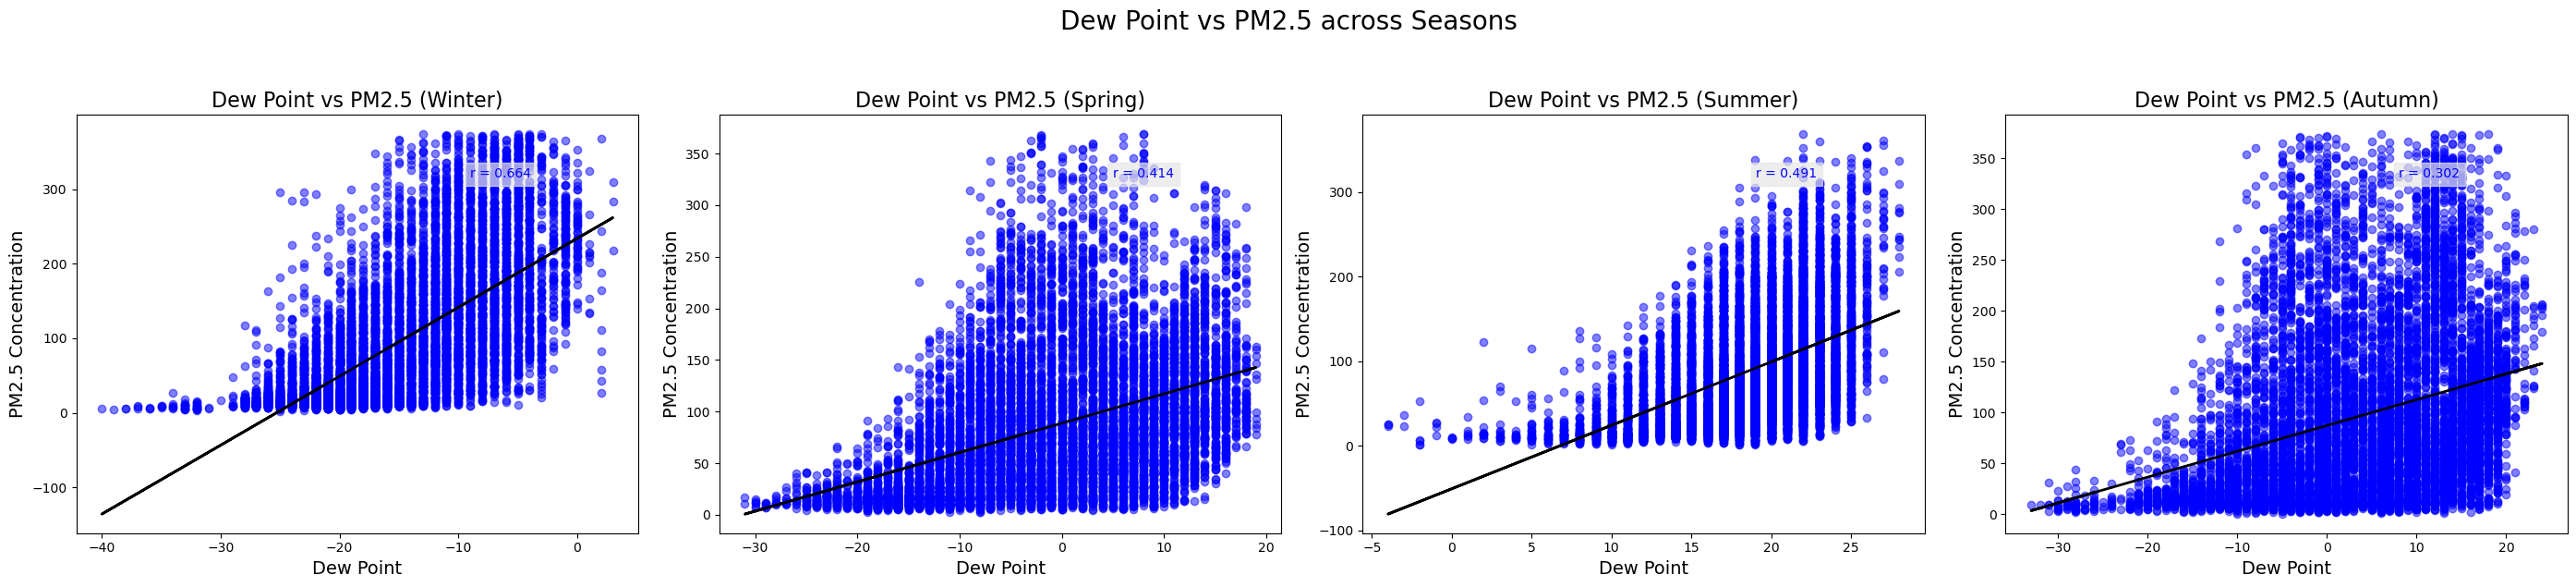

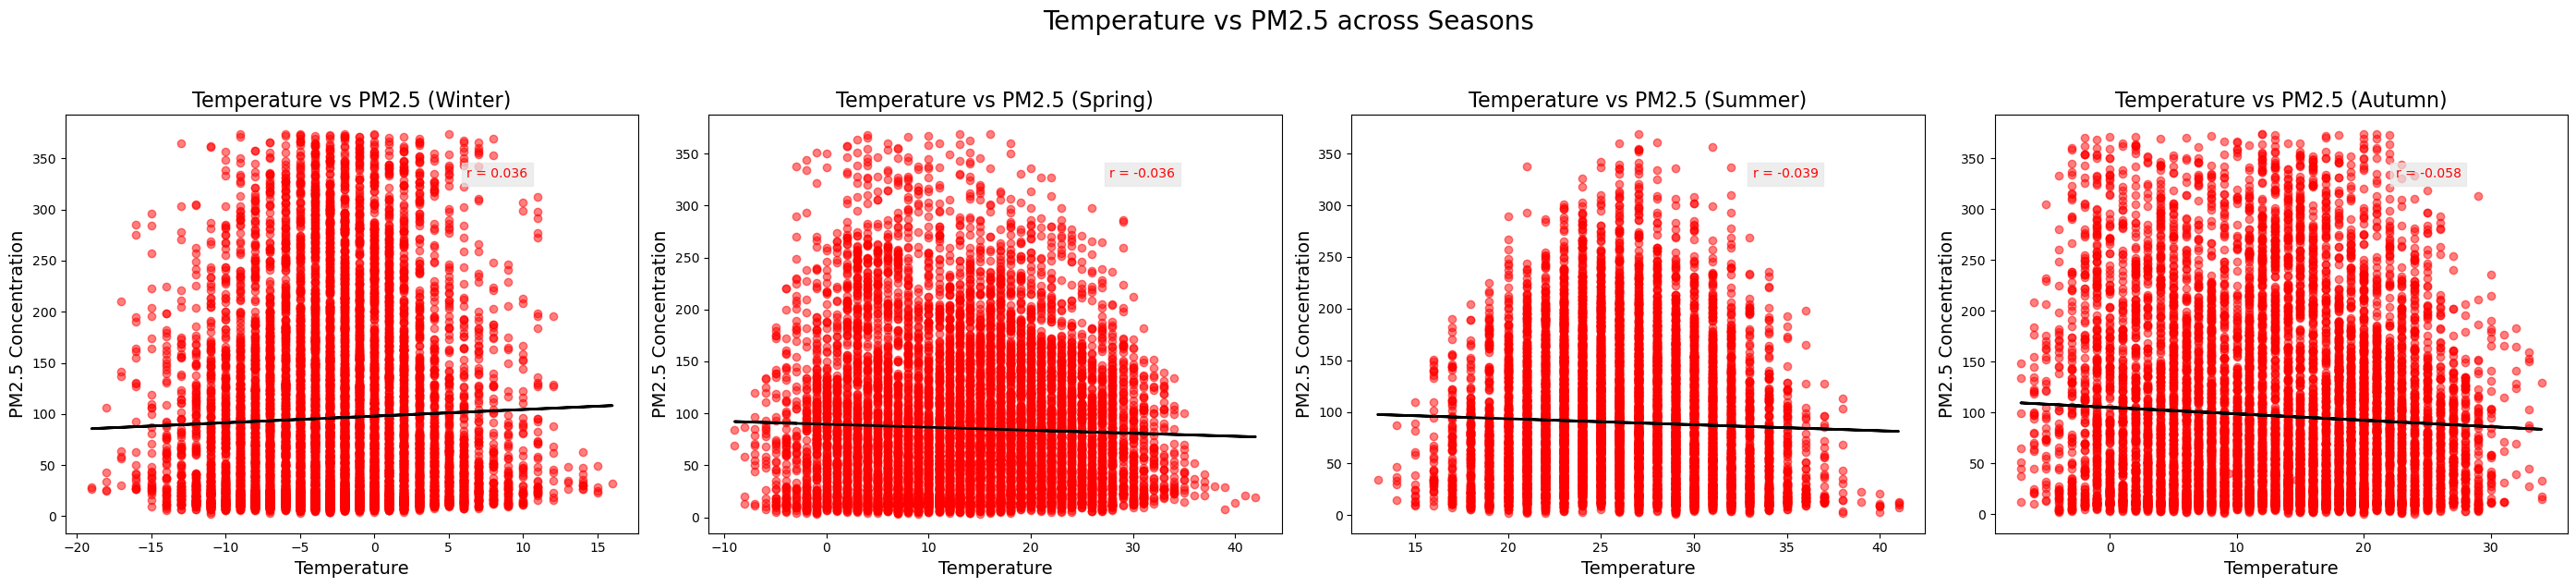

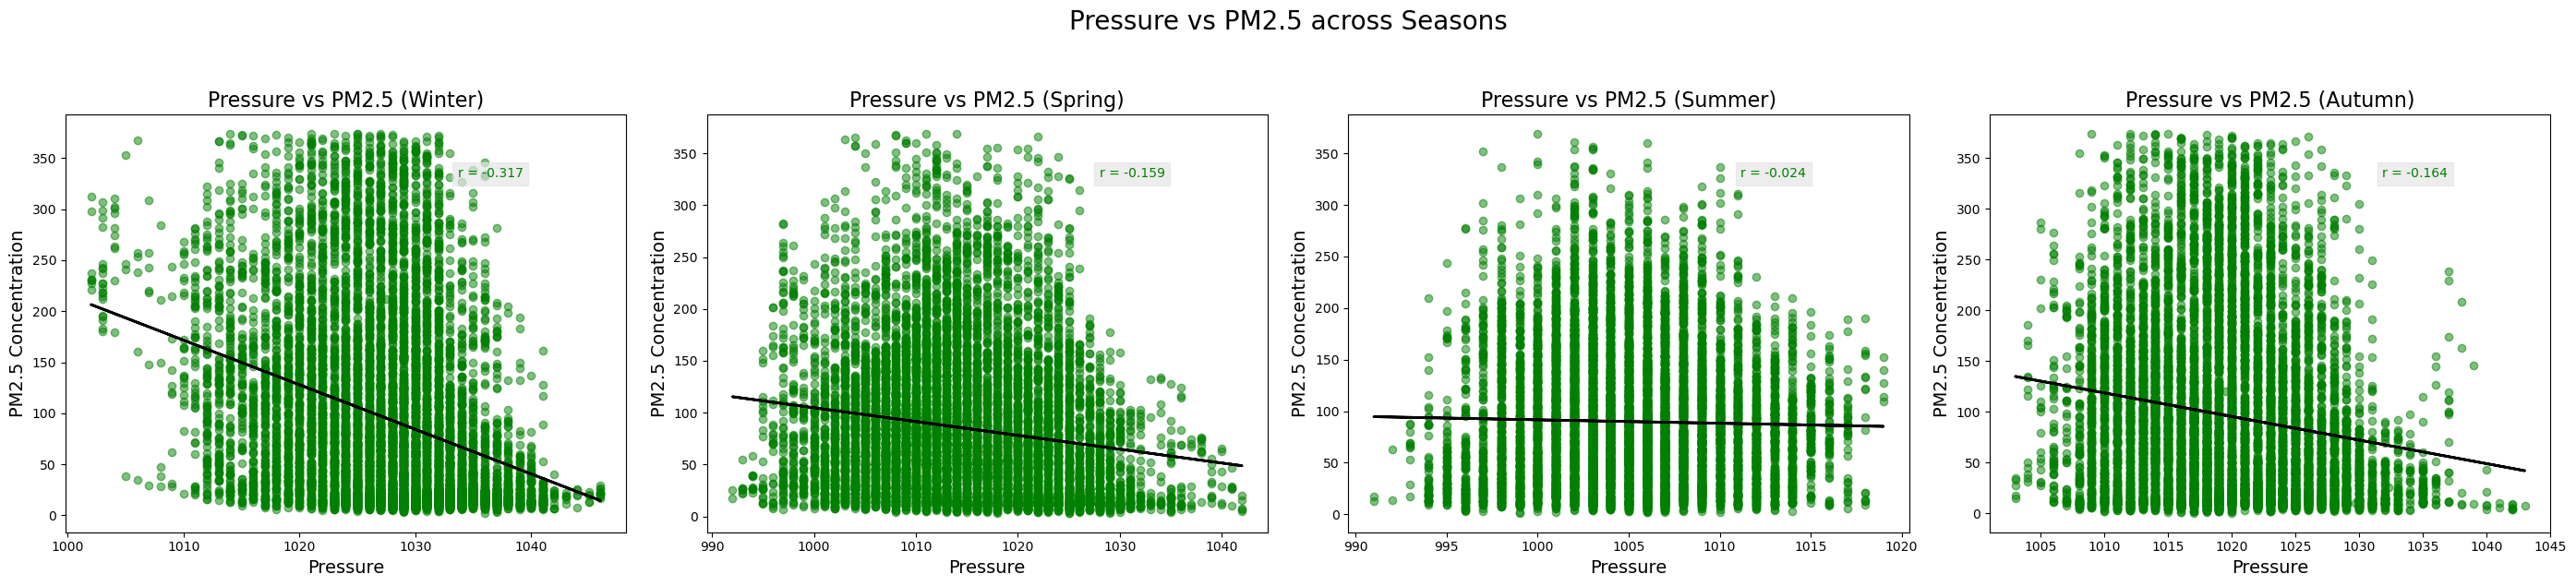

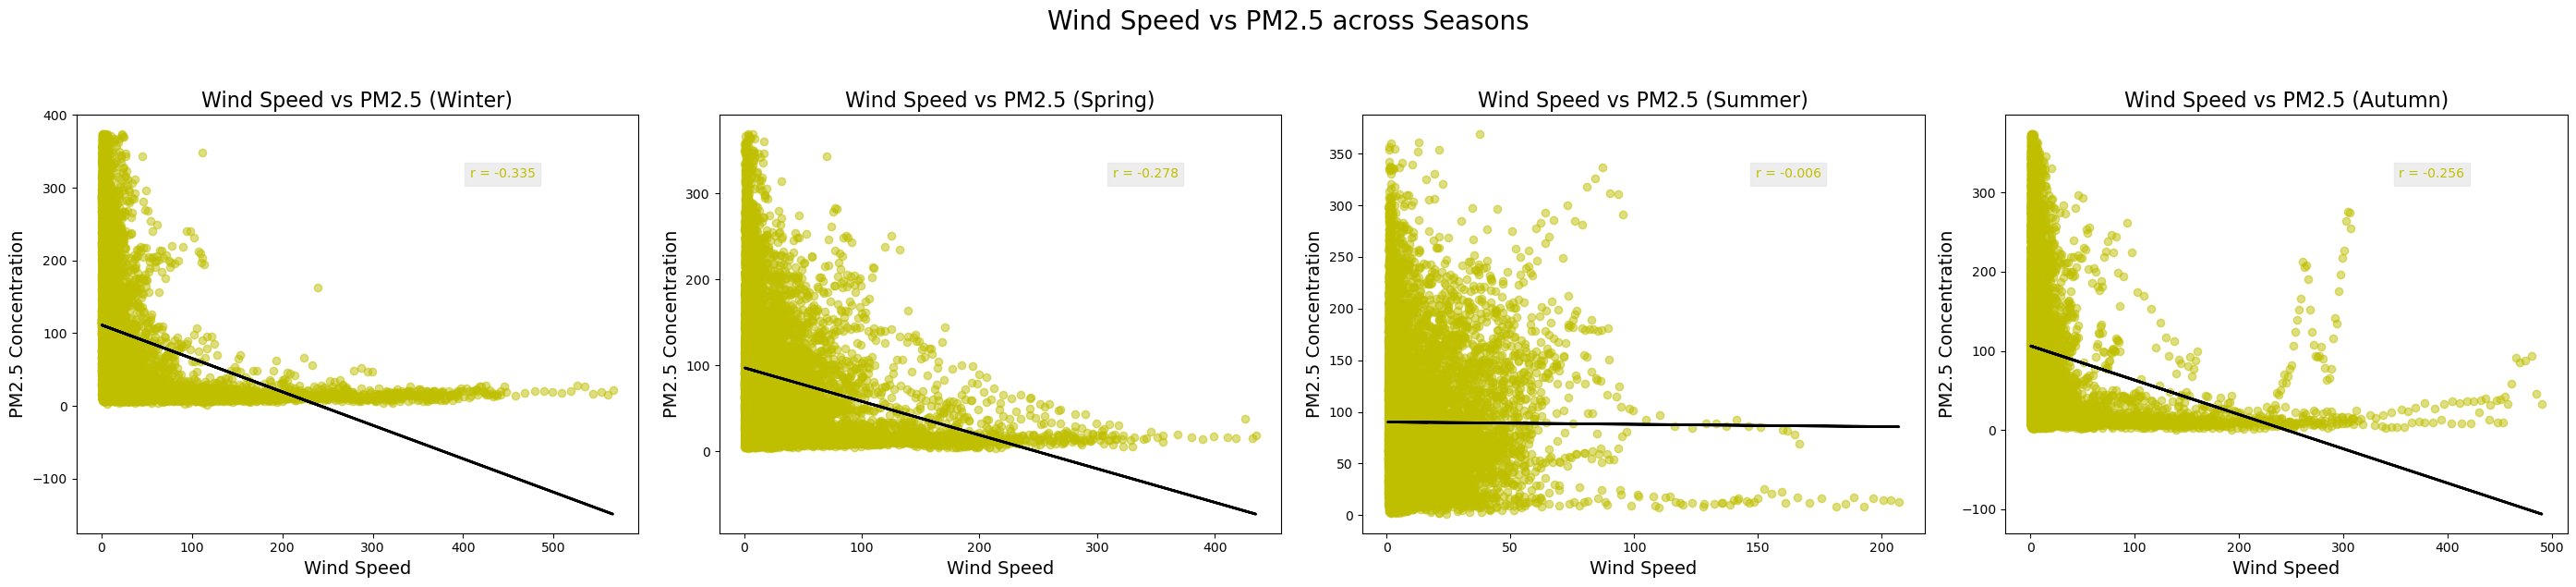

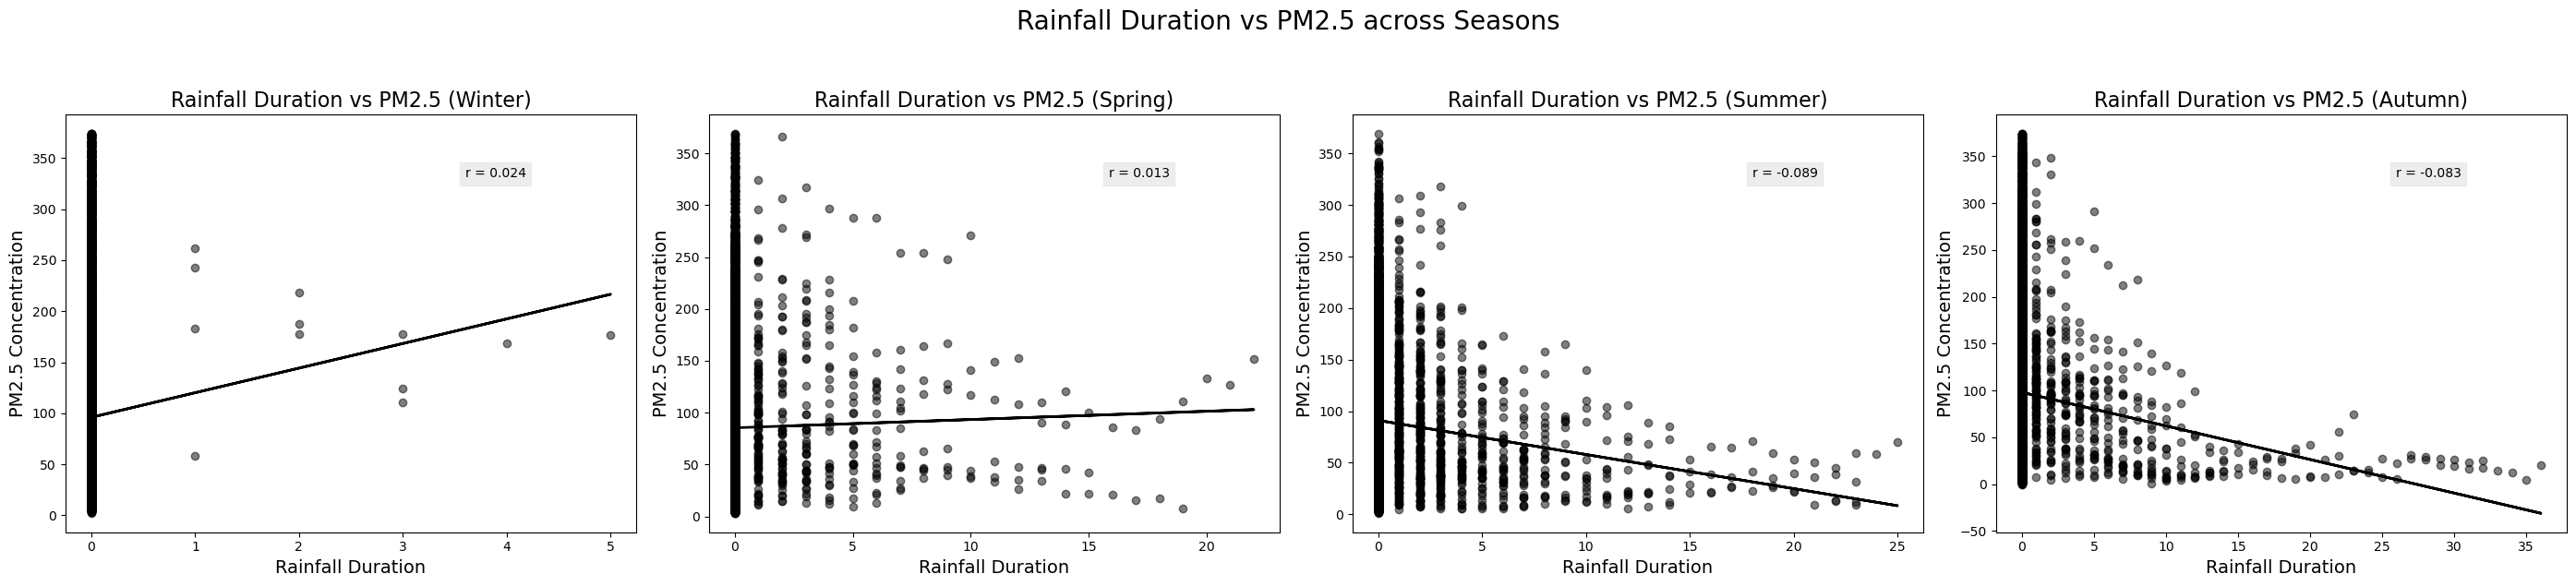

In [14]:
from scipy.stats import zscore, linregress 

def plot_descriptive():
    def get_season(m):
        if m in [12, 1, 2]:
            return 'Winter'
        elif m in [3, 4, 5]:
            return 'Spring'
        elif m in [6, 7, 8]:
            return 'Summer'
        else:
            return 'Autumn'


    df['season'] = df['month'].apply(get_season) #define the season

    df['z_concentration'] = zscore(df['concentration']) #remove the outliers
    df_clean = df[df['z_concentration'].abs() <= 3]

    # Variable and seasons
    seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
    variables = [
        ('dew point', 'Dew Point', 'b'),
        ('temperature', 'Temperature', 'r'),
        ('pressure', 'Pressure', 'g'),
        ('wind speed', 'Wind Speed', 'y'),
        ('rainfall duration', 'Rainfall Duration', 'k')
    ]


    def plot_regression_line(ax, x, y, **kwargs):
        slope, intercept, _, _, _ = linregress(x, y)
        ax.plot(x, slope * x + intercept, **kwargs)

    def corrcoeff(x, y):
        return np.corrcoef(x, y)[0, 1]

    # Plot per variabel
    for var, label, c in variables:
        fig, axs = plt.subplots(1, 4, figsize=(28, 6), tight_layout=True)

        for col, season in enumerate(seasons):
            df_s = df_clean[df_clean['season'] == season]
            x = df_s[var]
            y = df_s['concentration']
            ax = axs[col]

            # Scatterplot
            ax.scatter(x, y, alpha=0.5, color=c)

            # Regression
            plot_regression_line(ax, x, y, color='k', lw=2)

            # Correlation
            r = corrcoeff(x, y)
            ax.text(0.7, 0.85, f'r = {r:.3f}', color=c,
                    transform=ax.transAxes, bbox=dict(color='0.9', alpha=0.7))

            # Label & title
            ax.set_xlabel(label, fontsize=14)
            ax.set_ylabel('PM2.5 Concentration', fontsize=14)
            ax.set_title(f'{label} vs PM2.5 ({season})', fontsize=16)

        fig.suptitle(f'{label} vs PM2.5 across Seasons', fontsize=20, y=1.05)

    plt.show()
    
plot_descriptive()

The r value is improved after the data is categorized by season. To make it easier to read the data, the r-value data will be summarized in a table:

In [15]:
from scipy.stats import pearsonr, zscore

def get_season(m):
    if m in [12, 1, 2]:
        return 'Winter'
    elif m in [3, 4, 5]:
        return 'Spring'
    elif m in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['month'].apply(get_season)

df['z_concentration'] = zscore(df['concentration'])
df_clean = df[df['z_concentration'].abs() <= 3]

def table_summary(num=3):
    seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
    variables = [
        ('dew point', 'Dew Point'),
        ('temperature', 'Temperature'),
        ('pressure', 'Pressure'),
        ('wind speed', 'Wind Speed'),
        ('rainfall duration', 'Rainfall Duration')
    ]

    data = []
    for var, label in variables:
        row = {'Variable': label}
        for season in seasons:
            df_s = df_clean[df_clean['season'] == season] 
            x, y = df_s[var], df_s['concentration']
            r, _ = pearsonr(x, y)
            row[season] = round(r, 3)
        data.append(row)

    summary = pd.DataFrame(data).set_index('Variable')
    summary['Strongest Correlation'] = summary.abs().idxmax(axis=1)
    display_title('Summary of Correlation (r) Between PM2.5 Concentration and Meteorological Variables.', pref='Table', num=num, center=False)
    return summary

table_summary(num=3)


<br><br><p><span style="font-size: 1.2em;"><b>Table 3</b>: Summary of Correlation (r) Between PM2.5 Concentration and Meteorological Variables.</span></p>

Winter  Spring  Summer  Autumn Strongest Correlation
Variable                                                               
Dew Point           0.664   0.414   0.491   0.302                Winter
Temperature         0.036  -0.036  -0.039  -0.058                Autumn
Pressure           -0.317  -0.159  -0.024  -0.164                Winter
Wind Speed         -0.335  -0.278  -0.006  -0.256                Winter
Rainfall Duration   0.024   0.013  -0.089  -0.083                Summer

The linear trend line shows several things, namely:

- Dew point is the strongest positive predictor of PM2.5 increases.
- Wind speed and pressure are PM2.5 removal factors (both have a negative correlation).
- Winter has the highest correlation with PM2.5 concentrations among other season.
- Temperature and rainfall duration have the lowest correlation among the other variables.